# NLP in depth

本周视频 https://youtu.be/WV6i6nn33pY

Before transformer was invented, NLP was mostly using RNN or LSTM. But since <font color='blue'>transformed appeared in 2017</font>, RNN and LSTM are done. 

Soon after the invention of transformer, GPT came out, but for a long time beaten by BERT... GPT and BERT are two totally different technical path: Decoder only vs Encoder only thus they are suitable for different problems. <font color='green'> Imagine you were working for a startup called OpenAI in 2018, and your pioneering model GPT was suppassed by BERT in performance and popularity, what would you do? Develop a similar Encoder only model? Develop a Encoder+Decoder model? Join Google AI because they offer you a big package? </font> 

【It turns out OpenAI stick with the decoder-only structure and made the model 10, 1000, 10K times bigger with ... 】

Hui: Join Google

Xiuqi: 不考虑家庭原因，如果我对公司的产品非常的有信心，并且对公司发展的方向以及leadership非常有信心，我会留下来。

Shichen: - OpenAI started as a non-profit organization to promote the development of AI in a way that is safe and beneficial for everyone. With such a vision, the generative model based on a human language model is more in favor of taking the human's limited input and generate the relevant results based on it. The more training, the higher likelihood the model would rpovide the correct answers.
As an employee at OpenAI in year 2018, I (greedy, not heuristic) could have left the company as the company could not be considered as stable given the non-profit nature. 



# Transformer Architecture

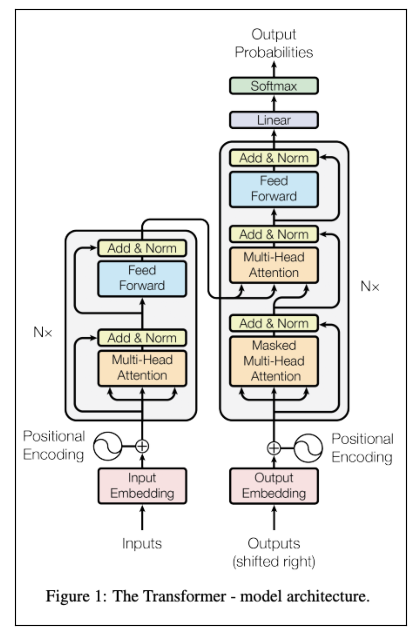

In [ ]:
import utils
utils.show_img('img/transformer_architecture.png', size_inch=8)


Paper: Attention is all your need https://arxiv.org/abs/1706.03762
Youtube explanation: https://www.youtube.com/watch?v=nzqlFIcCSWQ&list=PLFXJ6jwg0qW-7UM8iUTj3qKqdhbQULP5I&index=6

A group of smart people in Google came up with an idea to use self-attention in neural network to make the model more easily parallelized, no need to wait for sequential calculation of hidden state in RNN.  And this architecture performs  surprising well, beating the BLEU score SOTA by several percent! <font color='green'>But note, this architecture was designed for translation task. </font>

<font color='green'> Imagine you are a researcher in Google in 2017, and some guy from another group came to give a talk about a new architecture that achieves best translation result. You are working on a project on sentiment analysis (or recommendation system, or QA). Do you think this result is relevant to you at all?</font>

【A: I think so. They are all NLP tasks so there must be something in common.】

<font color='pink'> Fun fact:</font> Only one author of the transformer paper is still in Google by 2023 March. 

<font color='red'>Question:</font> What is a transformer architecture? Is transformer a CNN? Is transformer a RNN?

【A:

Transformer architecture: 
- Transformer uses the Encoder-Decoder framework. The encoder extracts token inforamtion and converts tokens into meaningful vectors; the decoder converts the vectors into task-specific output.
- The major technique used in transformer encoder is multihead self attention layer, and in decoder are multihead self attention layer and multihead attention layer. Attention/self attention mechanism allows the model to extract information on both direction and remember the information from all input tokens (in contrast, a normal RNN processes on forward direction only and forgets early information gradually). 
- On top of attention/self attention layer, transformer also use AddNorm layer, which is a combination of residual connection and layer norm. Residual connection greatly reduces gradient vanishing and allows the model to go deeper; layer norm increases data stability, speeds up training rate, and reduces overfitting.
- Additionally, transformer uses positionwise FFN, which is a two-layer dense layer.

Transformer was first applied to machine translation task. During training, the 'inputs' is one sentence, the 'outputs' is a shifted sentence in another language, and the 'outputs probablity' is the probability of next token from the vocabulary.  During inference, the the 'inputs' is one sentence, the 'outputs' is a the already generated  sentence in another language, and the 'outputs probablity' is the probability of next token from the vocabulary.


Transformer is not a CNN nor RNN. It doesn't use convolutional kernels or recurrent strategy. An early application of encoder decoder is seq2seq, which does use bidirectional and unidirectional RNN as its basic blocks.】

<font color='red'>Question:</font>  What part of transformer is similar to the convolutional layer of CNN, and why?

【A: Although transformer is not a CNN, there is similarity between the two. 
The multihead attention/self attention layers generate multiple results (multiheads) for each vector element, which is similar to CNN uses multiple kernels. Each head and each kernel focus on different aspects of the sample and therefore extract different features from it, and the layer is able to utilize multiple features to get an overall output.
】

<font color='red'>Question:</font> What makes transformer so special and efficient compared to CNN and RNN is self-attention. Attention is all you need! Explain self attention. Why it is a good structure?

【A:

- Both CNN and RNN use localized focus. CNN uses kernels to focus on a local space; RNN gradually "forgets" early input information, so it focuses on a local time sequence. The long range correlations and patterns is captured by the pooling layers in CNN but only weakly captured in RNN. 


- Attention mechanism, in contrast, calculates attention scores for any token pairs. This makes it great at absorbing the complete information.
- The vectors generated by attention uses the information of the whole sequence, instead of only using the corresponding tokens. This helps the model to grasp semantic and syntactic meaning.
- All in all, this is the foundation of context sensitivity that enables the model to extract overall ideas at the text level, to distinguish multiple meanings of a word (polysemy), etc. 

Self Attention vs. Attention

- Self attention check all possible pairs of token in a sequence in paralell. It's better at capturing the correlation between all token pairs; parelell check makes the process faster.
- Self attention can pay attention to different parts of sequences based on the task.
- Attention check token pairs sequencially (slower), and the earlier tokens can't see the later tokens (less correlation identified).
- Attention is more interpretable, since they allow us to see which parts of the input sequence are most important for making a particular prediction. (This is reflected in weight)
- Attention is more robust to noise and outliers in the input sequence, since they explicitly compute a weight for each token and can down-weight tokens that are less relevant. (This is reflected in weight as well.)


There are several reasons why self-attention is considered a good structure for certain tasks:

- Long-range dependencies: Self-attention allows the model to capture relationships between elements regardless of their distance in the input sequence. This helps in processing sequences with long-range dependencies, which are common in natural language and other sequential data.

- Parallelization: Unlike recurrent architectures such as LSTMs and GRUs, the self-attention mechanism processes the entire input sequence in parallel, allowing for more efficient computation on modern hardware like GPUs.

- Interpretability: Attention weights can provide insights into the model's decision-making process, as they indicate which parts of the input sequence the model deems most relevant for a specific output. This can help in understanding and debugging the model's behavior.

- Flexibility: The self-attention mechanism can be used in various configurations and can be combined with other types of layers (e.g., feed-forward layers, convolutional layers) to build powerful and adaptable models for different tasks.

Overall, self-attention has proven to be a powerful and versatile mechanism, contributing to the success of Transformer-based models in a wide range of natural language processing, computer vision, and reinforcement learning tasks.

】

<font color='red'>Question:</font> What is the advantage of transformer architecture compared to RNN?

【A:

- RNN is processed sequentially while transformer is processed in paralell at the query-key-value step, so RNN is less efficient and slower
- RNN gradually forgets information input in early steps, while transformer always knows all inputs (long term dependency)
- A normal RNN is processed in unidirection, while transformer go bidirectionally
- RNN uses gradient clipping to reduce gradient vanishing, while transformer uses more powerful residual connection to mitigate gradient vanishing 
】

<font color='red'>Question:</font> Explain residual-connect module. What is the function of res-connect module in transformer?

【A:

It's the same strategy used in ResNet. This strategy changes the original output of a layer from f(X) to f(X)+X, combining the input and output. Theoretically, deeper neural network should give better performance because adding more layers should improve the fitting. But in reality, the performance saturates at certain depth then degrades (See the plot below). The problem is that the modeling process is forward, but the error propagation is backward, thus the starting layers contribute to the modeling, but the ending layers are updated first...  


To solve this problem, Kaiming He proposed ResNet, to add original input to the residual. The idea is that by adding X to the output, the worst case is learning f(X)=0, which means this layer is useless. This makes sure this layer will not contribute negatively to the whole network. The gradient will be 1 in the worst case, thus propagate the error back efficiently. 

The module in transformer is AddNorm under nn.Module. It does dropout, layer norm, and residual connect sequentially. The function of res-connect module is as what is stated above: mitigating gradient vanishing, and preventing the model deviating from the optimal solution.



The function of residual connections in the Transformer architecture is to:

Improve optimization: Residual connections make it easier for gradients to flow through the network during backpropagation, especially in deep architectures. This helps in training deeper models more effectively.

Prevent vanishing gradients: By allowing gradients to bypass certain layers, residual connections help mitigate the vanishing gradient problem, which occurs when gradients become too small to effectively update the model's parameters.

Enable identity mappings: Residual connections allow the model to learn identity mappings when necessary, which can help in preserving the input information as it flows through the network.

Overall, the use of residual connections in the Transformer architecture contributes to its ability to scale up and handle deep networks, leading to improved performance in a variety of tasks.



】


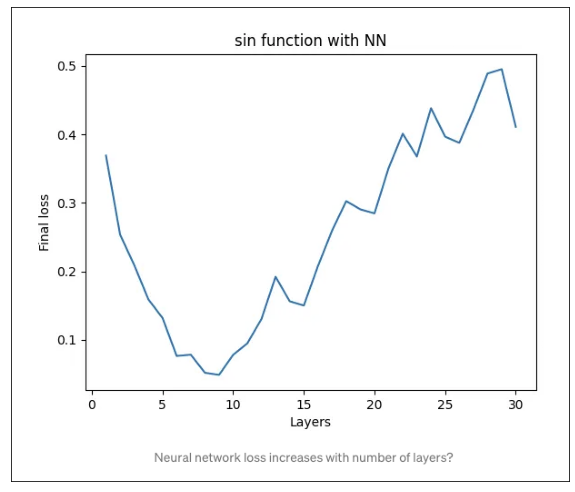

In [ ]:
import utils
utils.show_img('../NLP/img/loss_saturates.png', size_inch=10)

<font color='red'>Question:</font> What are the differences between the architectures of encoder and decoder?

【A:

Encoder-decoder in general is a framework for you to view neural network architecture. It cuts a model into two parts, encoder and decoder. In a model, the beginning nn layers that take in data and extract features from data can be viewed altogether as an encoder (encode data into features). The ending layers that utilize the features to get the final conclusion are altogether viewed as a decoder (decode feature insights into outputs).

An early successful application of encoder decoder is seq2seq, mainly used in machine translation. Its encoder can use bidirectional RNN while decoder can only use a unidirectional RNN.

Transformer is a big step forward of encode decoder architecture (变形金刚秒杀seq2seq). In the image above, the left half is encoder and the right half is decoder. There are a few differences between encoder and decoder:
- Encoder uses multihead self attention, while decoder's first attention is masked multihead self attention. Encoder takes in and process the whole sequence at once, while masking makes decoder to take in and process the sequence token by token.
- Decoder has one more attention layer, which is multihead, masked, non-self attention. It uses the output of encoder as key-value pair and uses the output after the masked multihead self attention in decoder as key-value pair and as query as well.
- Since the decoder block has one more attention layer than the encoder block, therefore the decoder block needs one more AddNorm layer.
- At the very end of decoder, a fully connected layer is necessary for the final output.
】

<font color='red'>Assignment:</font> Write code to calculate one-head self-attention score given k, q, v. 

In [1]:
import torch
from torch import nn

In [2]:
num_tokens = 5
k = torch.randn(num_tokens)
q = torch.randn(num_tokens)
v = torch.randn(num_tokens)

# use attention scoring function: -[(query-key)^2]/2:
# attention_score is "similarity" level between query and keys before passing into softmax
attention_score = -(q-k.reshape([-1,1]))**2/2  
# attention_weight is softmax normalized attention score
attention_weights = nn.functional.softmax(attention_score, dim=0)
# value of each query after attention
values = torch.mm(v.unsqueeze(0), attention_weights)

In [3]:
attention_score

tensor([[-1.5616e-03, -2.7411e+00, -1.2531e+00, -1.1700e-02, -9.0723e-03],
        [-1.4937e-09, -2.6117e+00, -1.3432e+00, -4.7074e-03, -1.8172e-02],
        [-5.2429e+00, -4.5379e-01, -1.1893e+01, -4.9333e+00, -5.8782e+00],
        [-7.7851e-02, -1.7878e+00, -2.0677e+00, -4.4255e-02, -1.7122e-01],
        [-6.9407e-01, -5.9987e+00, -1.0617e-01, -8.1317e-01, -4.8769e-01]])

# Bert Pretraining scripts
https://www.kaggle.com/code/vad13irt/language-models-pre-training

# GPT
Well, GPT is super popular now. It is a model proposed by OpenAI in 2018. It is the first model that uses transformer architecture. 

Wait, why I only know Bert before chatGPT was released? Seems nobody was using GPT before chatGPT. 

The problem with GPT is that it was not well accepted by academia community. GPT and GPT2 are open sourced, but their performance in most down-stream tasks is just close to Bert, even though with a much bigger model size. GPT3 shows awesome performance, but it is not open sourced. And its size (175B parameters) is impossible for a researcher to train. 

So the citation of Bert paper is about twice as much as GPT+GPT2+GPT3. 

<font color='green'> Seems chatGPT will change this trend. Let's see after two years.</font>

https://jalammar.github.io/illustrated-gpt2/

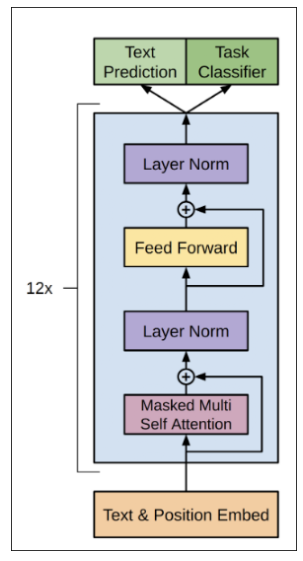

In [ ]:
utils.show_img('../NLP/img/gpt3_architecture.png', size_inch=10)

<font color='red'>Question:</font> What improvement does GPT2 make relative to GPT? How about GPT3?

【A: https://www.youtube.com/watch?v=t70Bl3w7bxY&t=1560s GPT1, GPT2, GPT3大力出奇迹 论文精读

GPTs are decoder-only transformers (with only one masked multihead self attention layer in each decoder block) developed by OpenAI.

(Transformer 2017/6, Google)

GPT1: 2018/6
- pretraining task: predict next word
- GPT1 use [extract] token (at sentence end) for sentence level task

(BERT 2018/10, Google)

GPT2 improvements over GPT: 2019/2
- larger size and more parameters: GPT has 117 million params while GPT2 has 1.5 billion, trained with more diverse data from different domains
- used larger data from Common Crawl (noisy) 
- GPT2 is a multitask model. With one given input, it can solve different tasks
- zero-shot: downstream task with no example (the performance was ok, not great)
- improved architecture and training tech
- achieved the best scores on a few NLP tasks

GPT3 improvements over GPT2: 2020/5
- larger size and more parameters: GPT3 has 175 billion
- GPT3 is applied <font color='red'>without any gradient updates or finetune</font> because it's too large. GPT3 is too large for finetune and it's so large that it doesn't need finetune. If a task needs finetune, that means we must find a big dataset for it and label the data as well. That's extra cost. GPT3 eliminates this trouble.
- very good performance on many NLP tasks, <font color='red'>can generate news articles that human can't distinguish from human written articles</font>. wow, crack Turing test on some sense!
- few-shot learning: GPT3 performs well on tasks with a few examples (GPT-3 shows that unsupervised language models trained with enough data can multitask to the level of fine-tuned state-of-the-art models by seeing just a few examples of the new tasks.) Although a few samples are given, GPT3's weights are not updated, no finetune happening.
- multilingual support
- improved architecture: GPT3 uses new types of attention mechanism (Sparse attention) and more efficient implementation of transformer. 

(80% articles on WSJ are written by bot...)
】

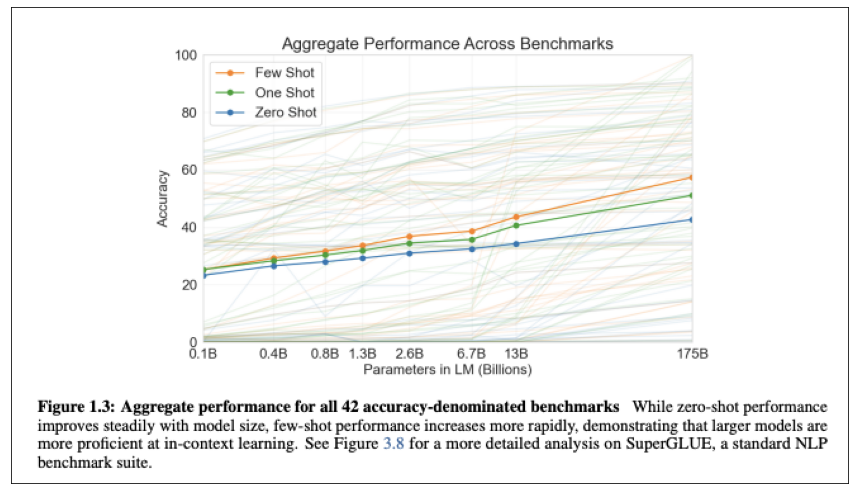

In [ ]:
utils.show_img('../NLP/img/dali.png', size_inch=15)

<font color='red'>Question:</font>  How is GPT3 trained? What is GPT optimizing during the training? How this is different from BERT?

【A:

GPT3 was trained using text data in Common Crawl (a database of over 45TB text from web pages) and a large collection of books and scientific papers. 
- GPT3 was trained by predicting the next word in a text. 
- GPT3 was also trained by few-shot learning, which allows the model to quickly adapt to new tasks with only a few examples. (GPT2 was trained using wikipedia articles to summarize their contents)

GPT-3 is trained to maximize the conditional probability of the next word in a text sequence given all the previous words (next word prediction). The weights in attention layer, FFN layer and layer norm are optimized to pursue the lowest loss.

BERT was trained using text data in BookCorpus and Wikipedia. BERT was trained using two tasks, MLM (masked language model) and predicting next sentence using a pair of sentences. 
- BERT was trained by MLM (masked language model). Since BERT uses transformer encoder with self attention layer, BERT is able to see the full context. Therefore, MLM task is to fill in the blank in the middle of a context using all revealed tokens in the text. In contrast, GPT3 uses transformer decoder with masked self attention, so it can only see the tokens before the blank, and its task is to predict the token in the blank using preceding tokens. GPT3's task is more challenging, and therefore achieves a higher goal once accomplished.
- BERT is also trained to judge if a 2nd sentence is the next sentence of a 1st sentence.
】

<font color='red'>Question:</font> Basd on GPT's training process, explain why chatGPT would hallucinate like "林黛玉倒拔垂杨柳“? Can you propose a way to solve this problem? 

【A:

GPT, as well as other language models, outputs contents word by word. Each time it is calculating the highest probable word coming next. When its training corpora contain conflicting contents or errors, it likely can't always tell which is true. It has mastered syntax (language pattern / structure) and learned quite a lot of words even long texts, but probably not very good at complex logic, common sense deduction and fact check. When you give it a non-fact prompt, it could go with it and continue to pop the next words.

For the specific case here: "林黛玉“ and "鲁智深“ are all from 四大名著, they have some similarities. Without much in depth training sample, P(倒拔垂杨柳|林黛玉,prompt)>P(弱柳扶风|林黛玉,prompt).

To solve hallucination:  

To mitigate hallucination in ChatGPT, you can try the following approaches:

* Knowledge base in specific domain + fine-tuning: Fine-tune the model on a more specific and smaller dataset that is carefully curated to exclude hallucinated or unrealistic text. This can help the model learn more meaningful and accurate relationships between words and phrases.

* Prompt engineering: Design better prompts or modify the input in such a way that encourages the model to generate more accurate and reliable responses. Experiment with different prompt styles and phrasings to see what works best.

* Model ensemble: Combine the predictions of multiple models to improve the overall output. Each model might have its own strengths and weaknesses, and an ensemble can provide a more balanced result.

* Regularization: Apply techniques like weight decay, dropout, or other regularization methods during training to prevent overfitting and to encourage the model to learn more robust representations.

* Post-processing: Implement a post-processing step to filter or correct the output generated by the model. This can be a rule-based approach, a machine learning-based approach, or a combination of both.

】

<font color='red'>Question:</font>  What special improvement of training did chatGPT implement?

【A: The biggest difference is chatGPT used Reinforcement Learning with Human Feedback (RLHF). This improves the performance significantly. 】

<font color='red'>Question:</font>  Why making a 175B model? Why a smaller one does not work? GPT4 does not publish its model size, what they want to hide and why? <font color='green'>If you are Sam Altman, will you do the same? Do you think you should stick with 'OpenAI' or make it commercial? </font>

【A: The performance improves with model size, and does not saturates. 

In the field of NLP, a long time debate is: should we design task specific models or build a super-sized model. From the success of ChatGPT, we can see currently the super-sized model won this round. More data means more knowledge and more insight understanding. 】

<font color='red'>Question:</font> Explain what is a 'few-shot learner'. Why 'few-shot learner' becomes a selling point? How 'few-shot learner' feature can be best exploited in chatGPT? Do you think a 175B parameter model can be revised with a few examples? What is happening during the 'few-shot learning'?

【A:

Few-shot learning utilizes pre-trained model and only requires very few samples for specific tasks. Traditional DL models requires large amounts of training data and labels for each task. Few-shot learning is very popular because (1) it greatly reduces the cost for sample collection, (2) its performance is so good that it reaches the level of fine-tuned state-of-the-art models, and (3) it is so easy to use by people who don't possess any AI expertise.

GPT is a few shot learner opens the door for prompt engineering. The model is not really updated by the prompt, the prompt just change the condition for calculating probablities. Similar to brain, different prompts activate different cortex. 
】

<font color='green'>Question:</font> Someone said chatGPT is 'every bit as important as the PC' or the internet. Someone said chatGPT is an 'iPhone moment'. Meanwhile, someone said chatGPT is 'not particularly innovative,' and 'nothing revolutionary' and is 'off ramp' to Artificial General Intelligence (AGI). Someone said chatGPT is a new cloud, and someone said it is a new super APP. What do you think? Do you think chatGPT is over-bragged, or you think it is under-estimated? Do you think it is just a new web portal that connect you to all you want, or it is innovative enough that it reshapes every aspect of human being? What is your chatGPT moment? 
 【Hui: I think it is a huge breakthrough and more scarily, it's still evolving fast. GPT4 even understands jokes from images, wow! I watched a movie when I was a kid. A mechanic robot was hit by lightening and developed human-like intelligence. The people in the movie tried to see if the robot had real intelligence by telling him a joke. The robot started to laugh after a minute and proved himself. And now is the time that happens in reality. I feel chatGPT shows the world a new stage of AI. Is it good or bad? I'm kinda worried. 】
 
【KK: For me, it is similar experience when I first saw search engine. 】

【Shichen: ChatGPT is a detailed application of GPT whose conception can be dated back to 2017-2018, and it is a natural result for chatgpt to achieve very good performance because of specifically trained process as well as the given computational power. So far chatgpt is able to achieve a number of tasks including 1. answering questions without the need to go thru the searching the content ourselves, 2. realizing the algorithmic content generation, which previously would take human's creativity and working hours to make, 3. self adaptive through few-shot learning. 

In comparison with tesla, iphone, or even internet is probably a good way to visualize the compact of chatgpt to the human society, as both of these two product are nothing quite innovative theoretically yet both influenced the market so dramatically by the end-user behavior significantly. Despite its inability to provide as solid informational research content, it has the capability to be optimized through continuous learning with the blessings from or the resources provided during this heated competetion. 

However, looking at the trend of all these technical break throughs, the attentions to this field from the global financial institutions would necessarily bring up the price of the company and companies with similar capabilities (e.g. Google, Baidu, etc), which would lead to an overly stated buzzword before everyone is calm down by the global economy.  】

【Xiuqi: 就像当年发明calculator之前，飞机制造公司请了好多人来做计算，队友现在还保留着当年他爷爷留下来的手动计算器。对我来说chat gpt就好像是这样的一个tool，大家可以更加高效的更加系统的学习一样知识，这个模型也可以更方便的为人所用。我想了解更多有关chatgpt的东西，很有可能ghatgpt就会变成calculator这样的tool，大大提高工作效率。】

【Shi：I use ChatGPT as a coding and writing aid, which has greatly increased the efficiency of my work, most importantly, it makes me feel more comfortable and cofident about coding. 】



After answering the questions above, you should already realize a few important things:
1. GPT3 is super big, GPT4 is a monster. 

2. For such a big model, fine-tuning would be expansive. Furthermore, using your own fine-tuned model is a few times of cost of using pre-trained model. 

3. Prompt Engineering is the cheapest way to ingest your own information and get the result you want. 

### Hands-on: Call OpenAI API

<font color='red'>Question:</font>  Go to OpenAI API pages, https://openai.com/product list how many different API services they provide now, and what problem they can solve. Give one use case of using any API. 

【A

- GPT-3: A powerful natural language processing (NLP) API that can be used for tasks such as language translation, summarization, and question-answering.
    - chat
    - generate embeddings for tasks like text classification, search, and clustering
    - summarize, synthesize, and answer question about large amounts of text
    - fine-tune GPT on specific tasks
- DALL-E: An API that generates images from textual descriptions, allowing users to create custom images without any manual drawing or design.
- Codex: A programming assistant API that can generate code snippets from natural language prompts, making it easier for developers to write code.
- CLIP: A computer vision API that can recognize and classify images and videos based on their content, enabling applications such as visual search and recommendation systems.
- API for Semantic Search: A search API that uses machine learning to understand the meaning of text and retrieve relevant results based on the user's intent.
- Embedding API

- Whisper API: transcribe speech into text and translate many languages into English


One use case for the OpenAI GPT-3 API is for chatbots in customer service. Companies can use GPT-3 to create conversational AI chatbots that can understand and respond to customer inquiries in natural language. This can help to reduce response times and improve the overall customer experience. For example, a bank might use a GPT-3-powered chatbot to answer questions about account balances, transactions, and credit card rewards.

】

【one use case: I used DALL-E to generate a picture with text input "a little girl is playing violin under moonlight, animals like bunny, squirrel and raccoon are watching".】

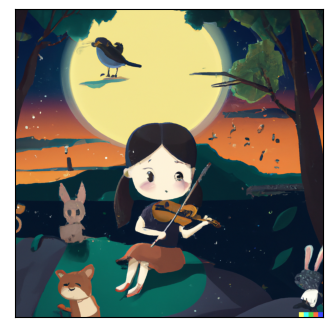

In [ ]:
utils.show_img('img/DALL·E 2023-04-05.png', size_inch=4)

<font color='red'>Assignment:</font> Use chatGPT API to get a manual of how to build chatGPT itself.  https://openai.com/product#made-for-developers

In [ ]:
pip install openai

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached openai-0.27.4-py3-none-any.whl (70 kB)
  Using cached aiohttp-3.8.4-cp39-cp39-macosx_10_9_x86_64.whl (360 kB)
  Using cached yarl-1.8.2-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached frozenlist-1.3.3-cp39-cp39-macosx_10_9_x86_64.whl (36 kB)
  Using cached multidict-6.0.4-cp39-cp39-macosx_10_9_x86_64.whl (29 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configur

In [8]:
import openai
#openai.api_key = "my key here"

In [7]:
prompt = "animal: cat -> voice: meow, animal: dog -> voice: woof, animal: lion -> voice:"
response = openai.Completion.create(
    engine="davinci-003",
    prompt=prompt,
    max_tokens=50,
    n=1,
    stop=None,
    temperature=0.7,
)
print(response.choices[0].text)
# in-context learning / few-shot learning

AuthenticationError: No API key provided. You can set your API key in code using 'openai.api_key = <API-KEY>', or you can set the environment variable OPENAI_API_KEY=<API-KEY>). If your API key is stored in a file, you can point the openai module at it with 'openai.api_key_path = <PATH>'. You can generate API keys in the OpenAI web interface. See https://platform.openai.com/account/api-keys for details.

In [ ]:
prompt = "what may cause overfitting in Convolutional nn"
response = openai.Completion.create(
    engine="davinci-003", # Change your engine
    prompt=prompt,
    max_tokens=250,
    n=1,
    stop=None,
    temperature=0.7,
)
print(response.choices[0].text) 

 layers)

Overfitting in Convolutional Neural Networks

Convolutional neural networks are particularly susceptible to overfitting. The networks try to learn the specifics of each image in the training set, which can cause the network to memorize details instead of learning the bigger picture.

You can prevent overfitting in CNNs by using a regularization technique to prevent the network from learning unnecessary details. One option is to use dropout layers in the network, which randomly disable some nodes in the network.

A particularly popular technique for preventing overfitting in Convolutional Neural Networks is using data augmentation. Data augmentation involves increasing the number of training samples by a technique that does not change the network’s output. For example, for each image, you can rotate the image by 90 degrees. This increases the number of training samples without changing the network’s output, so it will not overfit the network.

Overfitting in CNNs can also occu

<font color='red'>Optional Assignment:</font> If you are interested in building chatbot/personal assistant using OpenAI API, start reading the documentation of GPTindex and LangChain (Note: read GPTindex first, it is much better written). ★★★★★

https://gpt-index.readthedocs.io/en/latest/index.html

https://langchain.readthedocs.io/en/latest/

<font color='red'> Optional Assginment:</font> 
One example of building QA KnowledgeBot is here: https://www.youtube.com/watch?v=Dhc_fq5iCnUSummarize how to build the QA KnowledgeBot. ★★★★★

# Bert Architecture
Paper: https://arxiv.org/abs/1810.04805
Youtube Video: https://www.youtube.com/watch?v=ULD3uIb2MHQ

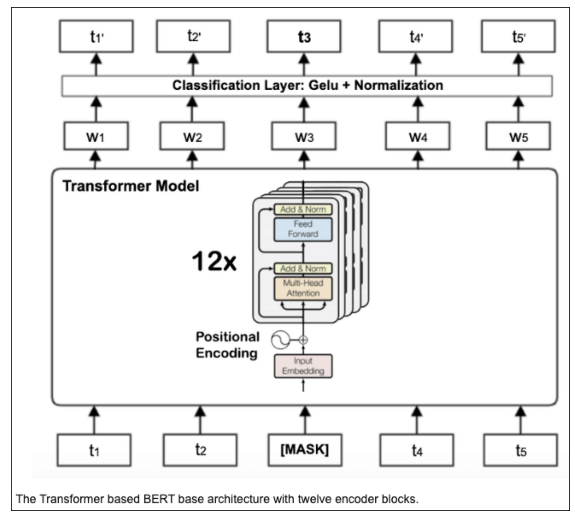

In [ ]:
import utils
utils.show_img('../NLP/img/bert_architecture.png', size_inch=10)

<font color='red'>Assignment:</font> Learn the architecture of BERT following the youtube video provided at least once, and answer the following questions:

<font color='red'>Question:</font> Give the full name of BERT, explain each word in the full name. 

【A:

BERT stands for Bidirectional Encoder Representations from Transformers.

Bidirectional: because BERT uses the architecture of transformer encoder, its attention layer is unmasked self attention. This makes BERT able to read the whole text at once so it can find connections between tokens order-independently. This is exactly "Everything Everywhere All at Once"! 😄

Encoder: this is related to bidirectional. Let's compare it to decoder. Decoder uses masked self attention and masked attention. This only allows decoder to read a sequence token by token from beginning to end, so it is unidirectional.

The word "Representations" does not have any technical importance. The only benefit of the word is to make the name BERT match the sesame street Bert  :)

Transformers: this indicates the source of encoder is a part of the transformer architecture.
】

<font color='red'>Question:</font> What is the relationship between BERT and transformer?

【A: The most important framework of BERT is exactly the encoder block of transformer architecture: multihead self attention, FFN and AddNorm. After 12 encoder blocks, we can add an additional layer on top to fit our specific tasks. Transformer, on the other hand, needs to pass the encoded information to its decoder for decoding.

Without decoder, BERT is not good at text generation tasks, such as QA, machine translation, summarization. GPT uses the other half of transformer, decoder, so it is good at generative tasks.】

<font color='red'>Question:</font> What part/ideas of BERT are from ELMO and GPT? 

【A: 
Here are some of the key ideas from ELMO that are incorporated into BERT:

Character-level embeddings: Like ELMO, BERT uses character-level embeddings to represent out-of-vocabulary words and capture subword information.

Deep, bi-directional language modeling: Both ELMO and BERT are based on deep, bi-directional language models that use a neural network to predict the probability of a word given its surrounding context.

Contextual embeddings: ELMO uses contextual embeddings that capture the meaning of a word based on its context, and BERT builds on this idea by using a Transformer encoder to generate contextualized word embeddings.

Here are some of the key ideas from GPT that are incorporated into BERT:

Pre-training on large amounts of text: Like GPT, BERT is pre-trained on large amounts of text in an unsupervised manner, which allows it to learn general features of language that can be applied to a wide range of downstream NLP tasks.

Transformer architecture: Both GPT and BERT use a variant of the Transformer architecture, which is designed to process sequences of input data, such as sentences or paragraphs, and has been shown to be highly effective for NLP tasks.

Fine-tuning on task-specific data: Like GPT, BERT is fine-tuned on task-specific data to adapt it to a particular NLP task, such as question answering or sentiment analysis.

Overall, while BERT incorporates ideas from both ELMO and GPT, it represents a significant advance over both models in terms of its ability to capture bidirectional context and generate high-quality contextualized word embeddings.
】

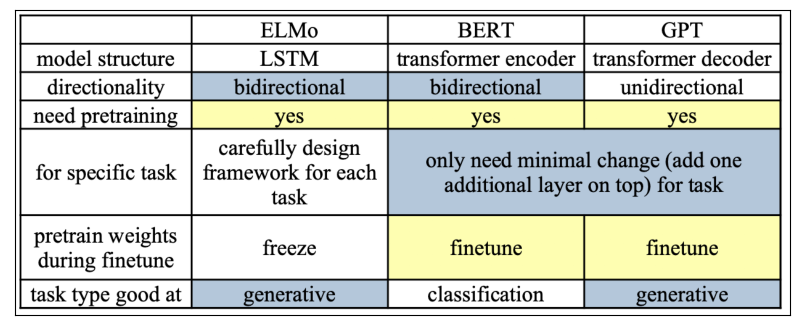

In [ ]:
utils.show_img('img/BERT_ELMo_GPT.png', size_inch=10)

<font color='red'>Question:</font> Explain why BERT needs positional embedding? How is positional embedding implemented (text OK, code preferred)?

【A:

BERT use self attention of transformer encoder, where each query correlates with all keys in paralell, so there is no positional information, only semantic information. Since token positions provide important information to language as well, positional embedding becomes necessary.

Positional embedding is another set of vectors which are learning during training along the rest of model parameters. Positional embedding is added to the token's original embedding and segment embedding (for sentence pairs), and the sum vectors are passed into self attention for training.

】

In [ ]:
# How positional embedding is incorporated

class BERTEncoder(nn.Module):
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input,
                 ffn_num_hiddens, num_heads, num_layers, dropout,
                 max_len=1000, key_size=768, query_size=768, value_size=768,
                 **kwargs):
        super(BERTEncoder, self).__init__(**kwargs)
        self.token_embedding = nn.Embedding(vocab_size, num_hiddens)
        self.segment_embedding = nn.Embedding(2, num_hiddens)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module(f"{i}", d2l.EncoderBlock(
                key_size, query_size, value_size, num_hiddens, norm_shape,
                ffn_num_input, ffn_num_hiddens, num_heads, dropout, True))
        ## positional embedding (batch_size, sentence length (max token num), token vector length)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, num_hiddens))
        

    def forward(self, tokens, segments, valid_lens):
        X = self.token_embedding(tokens) + self.segment_embedding(segments)
        ## postional embedding is added here. use X.shape[1] to cover all tokens in the sample 
        X = X + self.pos_embedding.data[:, :X.shape[1], :] 
        
        for blk in self.blks:
            X = blk(X, valid_lens)
        return X

### V2:

The positional embeddings in BERT are learned during pre-training, along with the token embeddings and other model parameters. They are represented as a fixed set of vectors, with each vector corresponding to a particular position in the input sequence. During fine-tuning, the positional embeddings are fixed and not updated.

Overall, the use of positional embeddings allows BERT to encode both the content and position of each token in the input sequence, which is necessary for many natural language processing tasks.

```python
import torch
import math

# Define the maximum sequence length and embedding dimension
max_seq_length = 512
embedding_dim = 768

# Create a tensor to hold the positional embeddings
pos_embedding = torch.zeros(max_seq_length, embedding_dim)

# Calculate the values for the positional embeddings
for pos in range(max_seq_length):
    for i in range(0, embedding_dim, 2):
        pos_embedding[pos, i] = math.sin(pos / (10000 ** ((2 * i) / embedding_dim)))
        pos_embedding[pos, i+1] = math.cos(pos / (10000 ** ((2 * i) / embedding_dim)))

# Add the positional embeddings to the input embeddings for each token
input_embeddings = ...
position_ids = torch.arange(max_seq_length, dtype=torch.long).unsqueeze(0)
position_embeddings = pos_embedding[position_ids, :]
embeddings = input_embeddings + position_embeddings

```

In this code, we first define the maximum sequence length and embedding dimension for BERT. We then create a tensor to hold the positional embeddings, which has dimensions (max_seq_length, embedding_dim).

Next, we use a nested loop to calculate the values for the positional embeddings. The first loop iterates over the positions in the input sequence, while the second loop iterates over the embedding dimensions. In the mathematical formula used to calculate the positional embeddings, the values of sine and cosine are applied to the position of the token and a scaling factor determined by the embedding dimension. This results in a series of values that oscillate between -1 and 1, with a frequency that increases as the position of the token increases.



Finally, we add the positional embeddings to the input embeddings for each token using the torch.arange() and torch.unsqueeze() functions to create a tensor of position IDs and then use those IDs to index into the positional embeddings tensor. The resulting embeddings tensor contains the combined embeddings for each token, which includes information about both the token's content and position within the sequence.





<font color='red'>Question:</font> How is BERT trained? What is Masked Language Modeling (MLM) and Next sentence prediction (NSP)? Does it needs human labeling? What is this method of training sample construction called?

【A:

BERT is trained by two tasks: Masked Language Modeling (MLM) and Next sentence prediction (NSP). These two tasks help BERT gain context sensitivity and good at classification tasks such as sentiment analysis, text classification, NLI.

MLM: the model randomly masks 15% tokens in the text (80% [MASK], 10% replaced by other words, 10% unchanged), and let the model to predict the masked words. This task forces BERT to learn the semantic relation between tokens in a sequence.

NSP: the model takes out sentence pairs from a text. Half of the pairs are consecutive sentence pair, and the other half are not. BERT needs to predict if the 2nd sentence is the next sentence of the 1st sentence. This task forces BERT to learn semantic relation in a longer context. 

Both tasks don't need human labeling, because BERT is able to see the original texts and generate the labels by itself.

This is called self supervised learning.
】

<font color='red'>Question:</font> What hyper-parameters do you need to adjust for fine-tuning a BERT model? What are the typical ranges?

【A:

Learning rate: The rate at which the model updates its parameters during training. Typical values range from 1e-5 to 5e-5.

Batch size: The number of examples the model processes at once during training. This is typically set to a value between 16 and 32.

Number of epochs: The number of times the model goes through the entire training dataset. This can vary depending on the size of the dataset and the complexity of the task.

Dropout rate: The rate at which the model randomly drops out units during training to prevent overfitting. Typical values range from 0.1 to 0.5.

Weight decay: A regularization parameter that penalizes large weights in the model. Typical values range from 0.01 to 0.001.

Sequence length: The length of the input sequences the model can handle. This depends on the task and the dataset, but typical values range from 128 to 512.

Warmup steps: The number of steps during which the learning rate is gradually increased from zero to its maximum value. Typical values range from 100 to 1000.】

<font color='red'>Question:</font> What is a token? What is tokenizer? Is one token a word? What type of tokenizer does BERT adopt? How many tokens are there? Why the author of BERT used this kind of tokenizer (wordPiece) instead of a big dictionary?

【A:

A token is a unit of text that a language model processes. Tokens can represent different levels of granularity depending on the tokenizer used, such as characters, words, subwords, or even entire sentences.

A tokenizer is a component or algorithm that takes raw text as input and converts it into a sequence of tokens. Tokenizers play a crucial role in natural language processing and understanding, as they help convert unstructured text data into a structured format that can be easily processed by language models.

One token is not always a word. Depending on the tokenizer used, a token can be a character, a word, a subword, or even a combination of these. The choice of tokenization method depends on the specific application, language, and model.

BERT adopts the WordPiece tokenizer, which is a subword tokenizer. **In WordPiece tokenization, words are broken down into smaller subword units or tokens. This method strikes a balance between character-level tokenization (which has a smaller vocabulary but requires a larger context) and word-level tokenization (which has a larger vocabulary but requires less context). WordPiece tokenization can handle out-of-vocabulary words by breaking them down into smaller, recognizable subword tokens.**

The number of tokens in the BERT vocabulary is 30,522 for the base model (English). However, the number of tokens can vary depending on the specific BERT model and the language it is trained on.

The authors of BERT used the WordPiece tokenizer instead of a big dictionary for several reasons:

* Efficiency: WordPiece tokenization reduces the vocabulary size, which leads to more efficient memory usage and faster training and inference times.
(=* Handling out-of-vocabulary words: WordPiece tokenization can break down out-of-vocabulary words into smaller subword tokens, making it more robust to rare or unseen words.
* Better handling of morphologically rich languages: WordPiece tokenization can capture the structure and meaning of words in languages with complex morphology (e.g., German, Turkish), where words can be formed by combining smaller subword units or morphemes.
* Improved performance: The WordPiece tokenizer has been shown to improve the performance of language models on various NLP tasks, as it can better capture the relationships between words and subword units.
】

<font color='red'>Question:</font> Distinguish the following methods: active learning, semi-supervised learning, self-supervised learning, weak supervised learning, contrastive learning. Give an example for each training method. 

【A:

1. Active Learning: Active learning is a training method in which a model is iteratively trained on a small set of labeled data, and then the model is used to select additional (most uncertained) data points to be labeled by a human annotator. The newly labeled data is then added to the training set, and the model is retrained. This process continues until the model achieves a desired level of performance.

Example: active learning is always used for image classification. In each round of active learning, the most uncertained samples are picked out for human labeling.

2. Semi-Supervised Learning: Semi-supervised learning is a training method in which a model is trained on a combination of labeled and unlabeled data. The goal is to use the unlabeled data to improve the model's performance on the labeled data.

Example: In the context of natural language processing, a semi-supervised learning approach might involve training a language model on a large corpus of unlabeled text and then fine-tuning the model on a smaller labeled dataset for a specific task, such as sentiment analysis. <font color='red'>self supervised pretrain + supervised finetune</font>

3. Self-Supervised Learning: Self-supervised learning is a training method in which a model is trained to predict a property of its own inputs, without the need for explicit supervision. This can involve training a model to predict the missing parts of an image, or to predict the next word in a sentence. Self-supervised learning is under the umbrella of unsupervised learning, which also includes clustering and dimension reduction.

Example: In the context of computer vision, a self-supervised learning approach might involve training a model to predict the relative positions of different objects in an image, without the need for labeled data. In NLP, pretraining methods like MLM and NSP are self supervied learning. <font color='red'>pretraining</font>

4. Weak Supervised Learning: Weak supervised learning is a training method in which a model is trained on noisy or incomplete labels, which are often cheaper or easier to obtain than fully labeled data. The goal is to use the weakly labeled data to improve the model's performance on a specific task.

Example: In the context of text classification, a weakly supervised learning approach might involve training a model on a large dataset of text with noisy labels, such as hashtags or keywords, and then fine-tuning the model on a smaller set of fully labeled data for a specific task, such as sentiment analysis. <font color='red'>noisy pretrain + better labeled finetune</font>

5. Contrastive Learning: Contrastive learning tries to learn a method to group samples based on their labels; the samples in a same group will be placed as close as possible and the samples in different groups will be placed as far as possible. The learned representation can then be used for downstream tasks like classification and clustering. (clustering is to use current data to group; contrastive learning is to find a way to contrastively represent the current data in groups based on labels) 

Example: In the context of computer vision, a contrastive learning approach might involve training a model to distinguish between two images that have been augmented in different ways, such as by cropping or rotation. The goal is to train the model to recognize the underlying structure of the data, rather than just memorizing specific examples. (image augmentation)

】

【Transfer learning: a model that has been trained on one task or domain is re-used as a starting point for training a new model on a different but related task or domain. So Pretained BERT used for a downstream task is an example of transfer learning.】

Self-supervised learning and contrastive learning are crucial to train large language model. They both easily turn huge amount of un-labeled data into labeled data. 

# T5 and BART
'Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer'

https://arxiv.org/abs/1910.10683

T5 is the model google proposed to complement Bert. 

<font color='red'>Question:</font>  What is the difference between Bert and T5/BART? What kind of tasks T5/BART might be better at than Bert?

【A: <font color='red'>decoder is important for generative tasks</font>

"T5" stands for "Text-to-Text Transfer Transformer". The key points of T5 are:

- Text-to-Text Approach: T5 is a "text-to-text" model, which means it takes in text as input and produces text as output. This is different from traditional models that take in different types of inputs (such as images or audio) and produce text as output. <font color='red'>[text in, text out]</font>

- Pre-Training Objectives: T5 is pre-trained on a large corpus of text using several different objectives, including text completion, text summarization, and machine translation. This allows the model to learn a wide range of language tasks and helps to improve its performance on downstream tasks. <font color='red'>[defined objectives]</font>

- Encoder-Decoder Architecture: T5 uses an encoder-decoder architecture, where the input text is first encoded into a fixed-length vector representation, and then decoded to produce the output text. This architecture is commonly used in sequence-to-sequence tasks such as machine translation and summarization. <font color='red'>[still use Transformer architecture]</font>

It seems T5 is not too much different from transformer, except it defined specific objectives and requires the output to be textual.

BERT vs T5: 
- BERT is a discriminative model mainly good at classification tasks (e.g., text classification, NLI, sentiment analysis, NER. still can do generative QA)
- T5 is a generative model that is good at a wider scope of NLP tasks, including classification tasks. T5 is particularly good at generative tasks (e.g., sota for machine translation; text generation, QA). 
- BERT uses transformer encoder only; T5 uses the whole transformer architecture- BERT uses transformer encoder only; T5 uses the whole transformer architecture
- BERT is pretrained using MLM and NSP; T5 is pretrained on more tasks including MLM, NSP, text completion, text summarization, and machine translation.
- BERT takes in a single text sequence as input and outputs a representation of that sequence; T5 takes in a pair of text sequences (input and target) and outputs a text sequence that matches the target sequence.


"BART" stands for "Bidirectional and Auto-Regressive Transformer". The key points of BART are:

- Bidirectional and Auto-Regressive: BART is a model that combines bidirectional and auto-regressive transformers (BART is a transformer without the attention layer in decoder block). The encoder self attention allows it to handle both left-to-right and right-to-left contexts, while the decoder attention only allows left-to-right flow. This is particularly useful for tasks such as text generation, where the model needs to be able to generate text in both directions.

- Masked Language Model Pre-Training: BART is pre-trained using a more complicated MLM than the one used by Bert (more tokens are masked). This allows the model to learn contextual representations of words and helps to improve its performance on downstream tasks.

- Data Augmentation Techniques: BART uses several data augmentation techniques during pre-training, including denoising auto-encoders and sequence permutation. These techniques help to improve the model's robustness to noisy and diverse inputs, and allow it to generalize better to new tasks and domains.

BART vs BERT: 
- since BART has both encoder and decoder, it is good at not only classification tasks (e.g., text classification, sentence entailment) but also generative tasks (e.g., machine translation, QA, text summarization).
- In BART pretraining, more tokens are masked for MLM
- BART has encoder and decoder (decoder misses the 2nd attention layer in the classic transformer), while BERT has encoder only

BERT, T5 and BART can all finetune for downstream tasks.
】

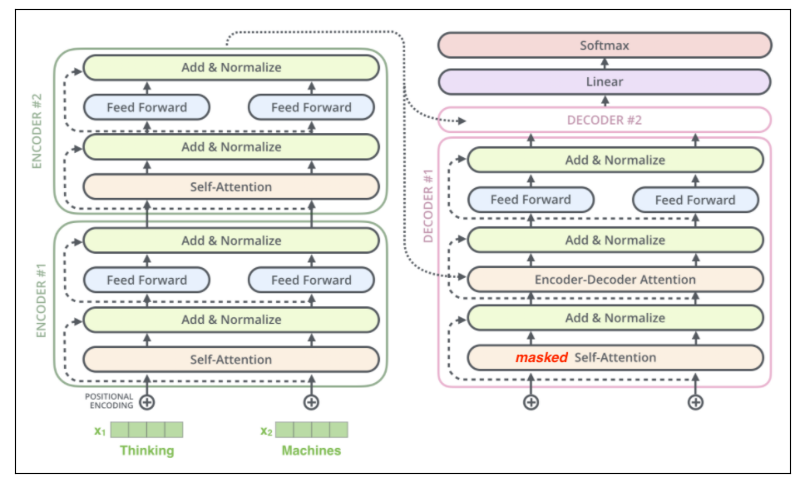

In [ ]:
utils.show_img('img/T5.png', size_inch=10)
# T5 architecture is the same as a classic transformer

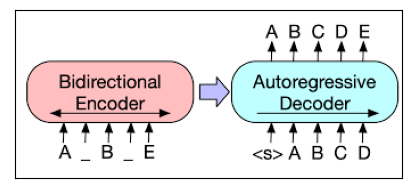

In [ ]:
utils.show_img('img/BART1.png', size_inch=5)
# BART's pretraining has more masked tokens than BERT's pretraining

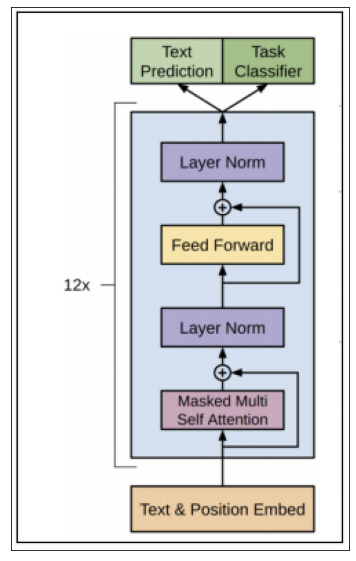

In [ ]:
utils.show_img('img/bart_decoder.png', size_inch=10)
# BART decoder block doesn't have the 2nd attention layer in the classic transformer

<font color='red'>Question:</font>  How is T5/BART pre-trained? 

【A:

T5 is pretrained on a set of tasks using text-to-text format:
- C4, which stands for "Colossal Clean Crawled Corpus": predicting the next token in the sequence
- "sequence-to-sequence with masked source" (Seq2Seq-Mask): masking a portion of the input text and training the model to generate the missing text
- machine translation
- QA
- summarization and many others

BART:
- masked language modeling: a randomly selected percentage of the input tokens are masked, and model is trained to predict the masked tokens
- denoising auto-encoding: the input text is corrupted by random deletion, swapping, and replacement of tokens, and the model is trained to reconstruct the original text
- sequence-to-sequence prediction: model is trained to generate the output sequence given the input sequence

T5 and BART utilize more portion of the classic transformer architecture than BERT, and they two are pretrained with more difficult and more diversed tasks than BERT.
】

# Application

<font color='red'>Question:</font> Explain what is transfer learning, what is fine-tuning. Why we fine-tune the model instead of training from scratch?

【A:

Transfer learning refers to a machine learning technique in which a model is first pre-trained on a large dataset and then fine-tuned on a smaller, task-specific dataset.

Finetune: when we have a defined task and a defined dataset, we add one more layer to the pretrained model to target the task, and then train the model using the dataset. Finetune updates the weights in the additional layer from beginning, and update the weights in pretrained layers slightly to make the model more suitable fore the define task.

In DL fields such as CV, NLP, audio processing, and robotics, small models trained with small amounts of data can hardly achieve good results. Therefore, people built very large models to train gigantic amounts of data, and use them as pretrained models. The pretrained models already obtained insights of language, so we can utilize the obtained knowledge and further finetune to fit better with specific tasks. If we train the models from scratch, the money/time cost would be unbearable.
】

<font color='red'>Question:</font> What parameters are tuned when training a bert based model?

【A:

- learning rate, normally in the range of 1e-5 to 5e-5
- batch size
- epochs
- dropout rate
- weight decay
- warmup step: This refers to the number of initial steps during training where the learning rate is gradually increased from a lower value to its maximum value. It can be used to help prevent overfitting and improve the performance of the model.
- maximum number of tokens
- task-specific parameters, such as number of output classes
】

<font color='red'>Question:</font> What is model distillation? Why we need model distillation?

【A:

Model distillation, also known as knowledge distillation, is a process of training a smaller and computationally efficient model to mimic the behavior of a larger and more complex model, often referred to as the teacher model. The goal of model distillation is to transfer the knowledge and performance of the teacher model to the smaller student model, without compromising on accuracy or performance.

There are several reasons why we need model distillation in machine learning. 
- reduce the computational complexity and memory requirements of the model, making it more practical for deployment on resource-constrained devices such as mobile phones or embedded systems. 
- improve the interpretability of the model, by distilling the knowledge from a large, complex model to a simpler, more understandable one.
- speed up the training process for new models, by using a pre-trained teacher model to guide the learning of a new student model. This can be especially useful in scenarios where labeled data is scarce or expensive to obtain.

The basic steps for performing model distillation are:

- Choose a pre-trained teacher model and a smaller student model with a simpler architecture.
- Train the teacher model on a large dataset to produce a probability distribution over the target classes.
- Train the student model to mimic the behavior of the teacher model by minimizing the difference between the output probabilities of the teacher model and the student model.
- Fine-tune the student model on the target task to improve its performance.
- During the distillation process, the student model is trained to predict the same probabilities as the teacher model, but with a smaller number of parameters. 
】

# Hands-on Project: Bert based Classification using triplet loss and contrastive learning. 

In this part, we will do a fine-tuning of Bert model for sentiment analysis. To make it more fun and fancy, we will not use the crossEntropy loss function that compares prediction with labels directly. Instead, we use <font color='red'>triplet loss</font>. Triplet loss is essential to contrastive learning, and it plays a major part in pre-training process of LLM and recent CV transformer models. The basic idea of contrastive learning is: I want the sources in the same group to be close with each other in latent space (embedding), and sources from different groups to be far away in latent space (embedding). To do this, triplet loss is introduced. Let's see how this is achieved.  

In [1]:
!pip install jupyterplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import shutil
import random
from jupyterplot import ProgressPlot
import time
import math

import time
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.9 MB/s eta 0:00:00
  Created wheel for lrcurve: filename=lrcurve-1.1.0-py3-none-any.whl size=69141 sha256=5ba1c976951377e32c93ac72e3b349ca77dc59597ea780267009b50415b32e23
  Stored in directory: /root/.cache/pip/wheels/96/9f/d7/161ecff6abb990c666b2bdab41c36eb04f88f3922a4a02eb95
Successfully built lrcurve


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
df_all = pd.read_csv('/content/drive/MyDrive/all_train.csv')

FileNotFoundError: ignored

In [ ]:
df_all = df_all.sample(5000,random_state=1)

df_all.reset_index(drop=True,inplace=True)
df_all

,description,y
0,"Taut and organically gripping, Edward Dmytryk'...",1.0
1,People criticize NSNA because it is a low-poin...,1.0
2,Why did I vote 10/10 for this movie that is ju...,1.0
3,I saw this movie on Mystery Science Theater 30...,0.0
4,I've read many negative reviews of this movie ...,1.0
...,...,...
4995,Hitchcock's original classic benefited tremend...,0.0
4996,"I enjoyed the movie very much, emotionally, in...",0.0
4997,then the second half of this movie is hard to ...,0.0
4998,I really can't believe this movie is not in th...,0.0


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=0.33, random_state=42)

In [ ]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [ ]:
df_train

,description,y
0,Mina Kumari exhibits more style and grace just...,1.0
1,"""Batman: The Mystery of the Batwoman"" is about...",1.0
2,I had been looking forward to seeing this film...,0.0
3,CAMP BLOOD Aspect ratio: 1.33:1 (Nu-View 3-D)S...,0.0
4,Gadar is a really dumb movie because it tells ...,0.0
...,...,...
3345,Despite being a sequel to the more potent orig...,0.0
3346,HAPPY DAYS was one of my favorite shows when i...,0.0
3347,I have been watching this show since I was 14 ...,1.0
3348,I saw that movie few days ago. This movie is s...,1.0


In [ ]:
df_train.head(30)

,description,y
0,Mina Kumari exhibits more style and grace just...,1.0
1,"""Batman: The Mystery of the Batwoman"" is about...",1.0
2,I had been looking forward to seeing this film...,0.0
3,CAMP BLOOD Aspect ratio: 1.33:1 (Nu-View 3-D)S...,0.0
4,Gadar is a really dumb movie because it tells ...,0.0
5,Unfortunately this original mix of action and ...,1.0
6,"Late, great Grade Z drive-in exploitation film...",1.0
7,This movie is só incredibly unfunny it makes a...,0.0
8,I happened upon this movie as an 8-10 year old...,1.0
9,We all know that some of the greatest movies o...,0.0


In [ ]:
df_test

,description,y
0,It is the best film i have seen in the last 5 ...,1.0
1,"I remember this movie from when i was 12, it w...",1.0
2,"Jodie Foster, Cherie Currie (the former lead s...",1.0
3,Clara Lago is wonderful as the title character...,1.0
4,John Leguizamo's one man shows are hit or miss...,1.0
...,...,...
1645,"From a military historian's standpoint, nearly...",1.0
1646,Low budget junk about bloodthirsty cultists in...,0.0
1647,"Lynne Ramsey makes arresting images, and Saman...",0.0
1648,If I assume that you know what this film is ab...,1.0


# Fine-tuning Bert using contrastive learning 

In [ ]:
# V1
#loss_func = T.nn.TripletMarginLoss()
#loss_val = loss_func(anch, pos, neg)
!pip3 install transformers
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
        
from torch import nn
from transformers import BertModel        
        
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import random
from torch.optim import Adam
from tqdm import tqdm

batch_size=32
epochs = 5

labels = {0:0,
          1:1,
          2:2,
          3:3,
          4:4,
          5:5
          }

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### See how the Triplet dataset is constructed. It is quite different from normal dataset. It needs a pair of positive and negative samples. Why?
【A: Triple loss needs an anchor sample, a positive sample which has the same label as the anchor, and a negative sample whitch has the different label from the anchor. The loss function learns to push the samples of a same label into a cluster and push the samples of different labels apart. 】

In [ ]:
class TripletDataset(torch.utils.data.Dataset):

    def __init__(self, df, train=True):
        self.is_train = train

        self.labels = df['y'] #[labels[label] for label in df['label']]
        self.texts = [tokenizer(str(text), 
                                padding='max_length', max_length = 64, truncation=True,
                                return_tensors="pt") for text in df['description'].tolist()]
        #self.texts = [self.bert_text_preparation(text) for text in df['item_name'].tolist()]
        self.index = df.index.values # array type
        self.raw = df['description'].tolist()
        

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)


    def __getitem__(self, idx):

        anchor_text = self.texts[idx]
        anchor_raw = self.raw[idx]
        if self.is_train:
            anchor_label = self.labels[idx]
            positive_list = self.index[self.index!=idx][self.labels[self.index!=idx]==anchor_label] #positive indices, excluding anchor

            positive_item = random.choice(positive_list) # return one random value from the list
            positive_text = self.texts[positive_item] # tokenizer output {input_ids, token_type_ids, attention_mask}
            positive_raw = self.raw[positive_item]
            
            negative_list = self.index[self.index!=idx][self.labels[self.index!=idx]!=anchor_label]
            negative_item = random.choice(negative_list) 
            negative_text = self.texts[negative_item]
            negative_raw = self.raw[negative_item]
            return anchor_text, positive_text, negative_text, anchor_label, (anchor_raw,positive_raw,negative_raw)

        else:
            return anchor_text
        

In [ ]:
train_ds = TripletDataset(df_train, train=True)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)

train_ds[0] #call __getitem__(), use idx 0 as anchor
torch.cuda.empty_cache()

In [ ]:
train_ds[0] #anchor_text, positive_text (random), negative_text (random), anchor_label, (anchor_raw,positive_raw,negative_raw)

({'input_ids': tensor([[  101, 22787,  9392,  1182, 10877,  1167,  1947,  1105, 11116,  1198,
           2232,  1121,  2288,   117,  1106,  2807,  1113,  1103,  1837,  1190,
           1128,  1169,  1525,  1107,  1211,  1168,  5558,   119,  1109,  1900,
           1144,  1666,  1167, 14113,  4429,  1104,  6893,  5295,  1190,  1122,
           1156,  3166,  1936,   119,  1109,  1390,  1105,  5923,  1110,  1104,
           1103,  2439,  1936,  3068,   119,  1192,  1336,  4430,  1107,  1103,
           1148,  2842,  2741,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### See how tripletloss is defined here!!!! It's simple and elegant! 

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin
        
    def calc_euclidean(self, x1, x2):
        return (x1 - x2).pow(2).sum(1) #这里应该开方 (x1 - x2).pow(2).sum(1).sqrt()
    
    def forward(self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor) -> torch.Tensor:
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative = self.calc_euclidean(anchor, negative)
        losses = torch.relu(distance_positive - distance_negative + self.margin)

        return losses.mean()
# x1和x2分别是anchor和pos或neg的embedding, shape (num_tokens, vector lenght)
# calc_euclidean 计算两个句子中对应位置的token的距离，然后在forward中relu、mean
# 不过两条review的words并不是一一对应的关系。这个方法是对整体的估算
# 直觉上觉得TripletLoss的准确度会差一点???


class BertEmbedding(nn.Module):

    def __init__(self, dropout=0.5):

        #super(BertClassifier, self).__init__()
        super(BertEmbedding, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased',output_hidden_states=True)

    def forward(self, input_id, mask):

        _, pooled_output,_hidden_states = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        # _ is last_hidden_state, equal to _hidden_states[-1]        
        # Getting embeddings from the final BERT layer
        token_embeddings = _hidden_states[-1]
        # Collapsing the tensor from 3D into 2D, if only 1 sample per batch
        # [batch size, sequence length (num_token), vector length (num_hiddens)] -> [sequence length (num_token), vector length (num_hiddens)]
        token_embeddings = torch.squeeze(token_embeddings, dim=0)
        # Converting torchtensors to lists
        list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

        return token_embeddings


def init_weights(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_normal_(m.weight)

In [ ]:
## 检查输出维度 ##

model = BertEmbedding()
#model.apply(init_weights)
#model = torch.jit.script(model).to(device)

use_cuda = True #False # GPU 16G ram
device = torch.device("cuda" if use_cuda else "cpu")

optimizer = optim.Adam(model.parameters(), lr=0.00001)
#criterion = torch.jit.script(TripletLoss())
#criterion = TripletLoss(margin=10)
criterion = torch.nn.TripletMarginLoss()



if use_cuda:

        model = model.cuda()
        criterion = criterion.cuda()


model.train()
for epoch in tqdm(range(epochs), desc="Epochs"): # tqdm shows progress bars for long iterations
    running_loss = []
    for step, (anchor_text, positive_text, negative_text, anchor_label, raw) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        print("train_loader round 1:\n", anchor_text) # 看输出维度
        anchor_mask = anchor_text['attention_mask'].to(device)
        anchor_input_id = anchor_text['input_ids'].squeeze(1).to(device)
        positive_mask = positive_text['attention_mask'].to(device)
        positive_input_id = positive_text['input_ids'].squeeze(1).to(device)
        negative_mask = negative_text['attention_mask'].to(device)
        negative_input_id = negative_text['input_ids'].squeeze(1).to(device)
        print("anchor_input_id:", anchor_input_id) # squeeze(1) took away dimension 1
        

        optimizer.zero_grad()
        anchor_out = model(anchor_input_id, anchor_mask)
        positive_out = model(positive_input_id, positive_mask)
        negative_out = model(negative_input_id, negative_mask)
        print("anchor_out:", anchor_out)

        loss = criterion(anchor_out, positive_out, negative_out)
        
        raise NotImplementedError()
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.cpu().detach().numpy())
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(running_loss)))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Training:   0%|          | 0/105 [00:00<?, ?it/s]

train_loader round 1:
 {'input_ids': tensor([[[  101,  1448,  1104,  ...,  5135,  1104,   102]],

        [[  101,   107,  1573,  ...,   114,  1253,   102]],

        [[  101,   107, 20008,  ...,  1129,  1251,   102]],

        ...,

        [[  101,   146,  1341,  ...,   117,  1133,   102]],

        [[  101,  1109,  2523,  ...,  4089,   114,   102]],

        [[  101,   146,  7284,  ...,  1106,  1474,   102]]]), 'token_type_ids': tensor([[[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]]]), 'attention_mask': tensor([[[1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1]],

        ...,

        [[1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1]],

        [[1, 1, 1,  ..., 1, 1, 1]]])}
anchor_input_id: tensor([[  101,  1448,  1104,  ...,  5135,  1104,   102


Epochs:   0%|          | 0/5 [00:01<?, ?it/s]


NotImplementedError: ignored

In [ ]:
model = BertEmbedding()
#model.apply(init_weights)
#model = torch.jit.script(model).to(device)

use_cuda = True #False # GPU 16G ram
device = torch.device("cuda" if use_cuda else "cpu")

optimizer = optim.Adam(model.parameters(), lr=0.00001)
#criterion = torch.jit.script(TripletLoss())
#criterion = TripletLoss(margin=10)
criterion = torch.nn.TripletMarginLoss()



if use_cuda:

        model = model.cuda()
        criterion = criterion.cuda()


model.train()
for epoch in tqdm(range(epochs), desc="Epochs"): # tqdm shows progress bars for long iterations
    running_loss = []
    for step, (anchor_text, positive_text, negative_text, anchor_label, raw) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        anchor_mask = anchor_text['attention_mask'].to(device)
        anchor_input_id = anchor_text['input_ids'].squeeze(1).to(device)
        positive_mask = positive_text['attention_mask'].to(device)
        positive_input_id = positive_text['input_ids'].squeeze(1).to(device)
        negative_mask = negative_text['attention_mask'].to(device)
        negative_input_id = negative_text['input_ids'].squeeze(1).to(device)
        
        optimizer.zero_grad()
        anchor_out = model(anchor_input_id, anchor_mask)
        positive_out = model(positive_input_id, positive_mask)
        negative_out = model(negative_input_id, negative_mask)
        
        loss = criterion(anchor_out, positive_out, negative_out)
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.cpu().detach().numpy())
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(running_loss)))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Epochs:  20%|██        | 1/5 [02:00<08:02, 120.71s/it]

Epoch: 1/5 - Loss: 1.0146



Epochs:  40%|████      | 2/5 [04:00<06:00, 120.21s/it]

Epoch: 2/5 - Loss: 0.6992



Epochs:  60%|██████    | 3/5 [05:58<03:58, 119.37s/it]

Epoch: 3/5 - Loss: 0.5297



Epochs:  80%|████████  | 4/5 [07:54<01:57, 117.97s/it]

Epoch: 4/5 - Loss: 0.3546



Epochs: 100%|██████████| 5/5 [09:48<00:00, 117.63s/it]

Epoch: 5/5 - Loss: 0.2048


In [ ]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/model_tripletloss_multi.model')


In [ ]:
model = BertEmbedding()
model.load_state_dict(torch.load('/content/drive/MyDrive/model_tripletloss_multi.model'))
model.eval()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertEmbedding(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_aff

# Extract Bert Embedding after fine-tuning. See how the new dataset is different from TripletDataset. 

In [ ]:
# Bert Embedding TSNE after fine tuning
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['y']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 64, truncation=True,
                                return_tensors="pt") for text in df['description'].tolist()]
        #self.texts = [self.bert_text_preparation(text) for text in df['item_name'].tolist()]
        

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


In [ ]:
## 检查输出维度 ##
pred = Dataset(df_test)
pred_dataloader = torch.utils.data.DataLoader(pred, batch_size=32,shuffle=False)

use_cuda = torch.cuda.is_available()
#use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    model = model.cuda()

target_word_embeddings = []
for pred_input, pred_label in tqdm(pred_dataloader):
    
    pred_label = pred_label.to(device)
    mask = pred_input['attention_mask'].to(device)
    input_id = pred_input['input_ids'].squeeze(1).to(device)
    output = model(input_id, mask) # output.shape is [32, 64, 768] batch size, max tokens, vector length
    print("output:", output.shape, output)
    
    for item in output:
        target_word_embeddings.append(item[0].to('cpu').tolist()) # 抽出每条review的第一个token <cls> 的vector
    print("target_word_embeddings,", len(target_word_embeddings), len(target_word_embeddings[0]), target_word_embeddings[1])
    # target_word_embeddings 形状是32,768
    break

  0%|          | 0/52 [00:00<?, ?it/s]

output: torch.Size([32, 64, 768]) tensor([[[ 0.0215, -0.0562, -0.4735,  ..., -0.0144,  0.9087,  0.5501],
         [-0.0765, -0.1131, -0.3862,  ...,  0.0300,  0.8432,  0.5979],
         [-0.0691,  0.0461, -0.3582,  ..., -0.0280,  0.7926,  0.6208],
         ...,
         [-0.0840, -0.1036, -0.5011,  ...,  0.1976,  0.7258,  0.6790],
         [ 0.0066, -0.0951, -0.3477,  ...,  0.1062,  0.7457,  0.6263],
         [-0.3538,  0.0763, -0.7608,  ...,  0.0053,  1.5582,  0.5324]],

        [[ 0.0981,  0.0513, -0.5129,  ..., -0.1056,  0.8783,  0.4885],
         [ 0.1235, -0.1476, -0.3123,  ...,  0.1043,  0.8259,  0.5744],
         [ 0.0702, -0.0683, -0.3877,  ...,  0.1078,  0.6767,  0.3723],
         ...,
         [-0.0334,  0.0807, -0.3220,  ...,  0.0358,  0.7643,  0.5443],
         [-0.0195, -0.0073, -0.3828,  ...,  0.1121,  0.7898,  0.5469],
         [-0.2717,  0.1859, -0.8358,  ..., -0.0922,  1.5183,  0.5351]],

        [[-0.0537, -0.0566, -0.3028,  ..., -0.0628,  0.8753,  0.3069],
         [-

In [ ]:
pred = Dataset(df_test)
pred_dataloader = torch.utils.data.DataLoader(pred, batch_size=32,shuffle=False)

use_cuda = torch.cuda.is_available()
#use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    model = model.cuda()

target_word_embeddings = []
for pred_input, pred_label in tqdm(pred_dataloader):
    
    pred_label = pred_label.to(device)
    mask = pred_input['attention_mask'].to(device)
    input_id = pred_input['input_ids'].squeeze(1).to(device)
    output = model(input_id, mask) # output.shape is [32, 64, 768] batch size, max tokens, vector length

    for item in output:
        target_word_embeddings.append(item[0].to('cpu').tolist()) # 抽出每条review的第一个token <cls> 的vector
        

100%|██████████| 52/52 [00:08<00:00,  5.87it/s]


In [ ]:
len(target_word_embeddings) == len(df_test)

True

<font color='red'> Question </font> How the embedding is extracted? 

Why extracting output of one token can represent the whole text? 

【A: 

Tokenized texts (input_ids which are the token indices, and attention_mask where are all 1 since no mask for finetune) are fed into BERT, changing into vectors through BERT encoder blocks, and output after the last hidden layer. In pretrain and finetune, all output vectors are then fed into a loss function (triplet loss, cross entropy loss, etc). Through back propagation, the weights in BERT are updates and vector embedding will be updated accordingly. 

In inference, only the vector of the first token <cls> is extracted from the BERT output vectors by item[0]. This is appended to target_word_embeddings, and used for the following tSNE visualization. 
  
64 can be tuned, as long as your computing power and GPU memory allow. 】

<font color='red'>Optional Question</font> Another way of extracting embedding is using the [CLS] token embedding. Implement this method. 

In [ ]:
model_cls = BertEmbedding()
#model.apply(init_weights)
#model = torch.jit.script(model).to(device)

use_cuda = True #False # GPU 16G ram
device = torch.device("cuda" if use_cuda else "cpu")

optimizer = optim.Adam(model_cls.parameters(), lr=0.00001)
#criterion = torch.jit.script(TripletLoss())
#criterion = TripletLoss(margin=10)
criterion = torch.nn.TripletMarginLoss()



if use_cuda:

        model_cls = model_cls.cuda()
        criterion = criterion.cuda()


model_cls.train()
for epoch in tqdm(range(epochs), desc="Epochs"): # tqdm shows progress bars for long iterations
    running_loss = []
    for step, (anchor_text, positive_text, negative_text, anchor_label, raw) in enumerate(tqdm(train_loader, desc="Training", leave=False)):
        anchor_mask = anchor_text['attention_mask'].to(device)
        anchor_input_id = anchor_text['input_ids'].squeeze(1).to(device)
        positive_mask = positive_text['attention_mask'].to(device)
        positive_input_id = positive_text['input_ids'].squeeze(1).to(device)
        negative_mask = negative_text['attention_mask'].to(device)
        negative_input_id = negative_text['input_ids'].squeeze(1).to(device)
        
        optimizer.zero_grad()
        # extract [cls] embedding and put it alone into loss
        anchor_out = model_cls(anchor_input_id, anchor_mask)[:,0,:]
        positive_out = model_cls(positive_input_id, positive_mask)[:,0,:]
        negative_out = model_cls(negative_input_id, negative_mask)[:,0,:]
        
        loss = criterion(anchor_out, positive_out, negative_out)
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.cpu().detach().numpy())
    print("Epoch: {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(running_loss)))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Epochs:  20%|██        | 1/5 [01:59<07:58, 119.70s/it]

Epoch: 1/5 - Loss: 0.9589



Epochs:  40%|████      | 2/5 [04:02<06:04, 121.50s/it]

Epoch: 2/5 - Loss: 0.7137



Epochs:  60%|██████    | 3/5 [06:01<04:01, 120.58s/it]

Epoch: 3/5 - Loss: 0.5621



Epochs:  80%|████████  | 4/5 [07:58<01:59, 119.09s/it]

Epoch: 4/5 - Loss: 0.4212



Epochs: 100%|██████████| 5/5 [09:53<00:00, 118.66s/it]

Epoch: 5/5 - Loss: 0.2702


In [ ]:
# Save the model
torch.save(model_cls.state_dict(), '/content/drive/MyDrive/model_tripletloss_cls.model')

<font color='red'>Question</font> Why extracting output of one token can represent the whole text? 

【A: during finetune, loss function evaluates using that single token, so classification information is forced to compress into that token. Therefore, the token is enough to represent the whole sequence for the specific task. BERT uses self attention, so any vector is generated from all the inputs, and therefore the vector of a single token can represent the whole text.】

# Visulization of embedding

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
#tsne_pca_results = tsne.fit_transform(pca_result_50)
tsne_results = tsne.fit_transform(np.array(target_word_embeddings))
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 4.742309093475342 seconds


In [ ]:
df_test['tsne-one'] = tsne_results[:,0]
df_test['tsne-two'] = tsne_results[:,1]

(-5.0, 5.0)

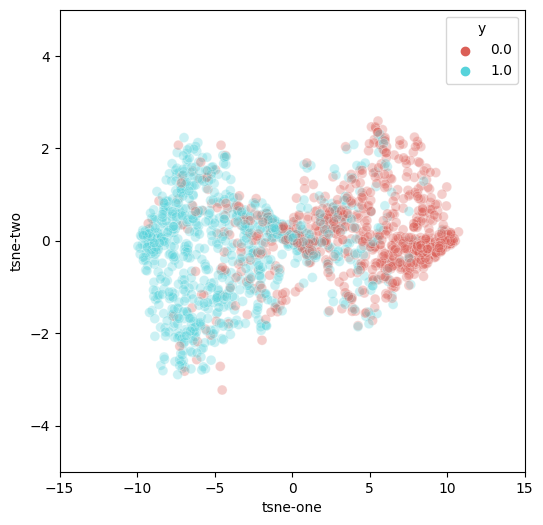

In [ ]:
plt.figure(figsize=(6,6))
hue = 'y'
ax3 = plt.subplot(1, 1, 1)
sns.scatterplot(
        x="tsne-one", y="tsne-two",
        hue='y',
        palette=sns.color_palette("hls",2),
        data=df_test,
        legend="full",
        alpha=0.3,
        ax=ax3, s=50
    )

plt.xlim([-15,15])
plt.ylim([-5,5])



(-3.0, 3.0)

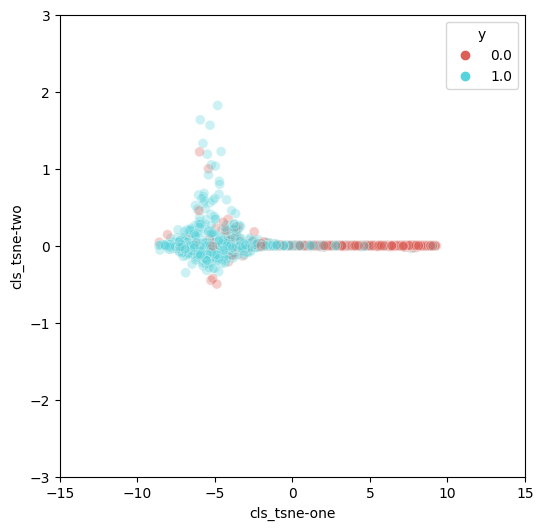

In [ ]:
# visualize the results of model_cls (using [cls] alone during training)
model_cls.eval()

pred = Dataset(df_test)
pred_dataloader = torch.utils.data.DataLoader(pred, batch_size=32,shuffle=False)

use_cuda = torch.cuda.is_available()
#use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
    model_cls = model_cls.cuda()

target_word_embeddings = []
for pred_input, pred_label in tqdm(pred_dataloader):
    
    pred_label = pred_label.to(device)
    mask = pred_input['attention_mask'].to(device)
    input_id = pred_input['input_ids'].squeeze(1).to(device)
    output = model_cls(input_id, mask) # use model_cls to calculate embedding

    for item in output:
        target_word_embeddings.append(item[0].to('cpu').tolist())  #extract [cls] vector

from sklearn.manifold import TSNE
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
#tsne_pca_results = tsne.fit_transform(pca_result_50)
cls_tsne_results = tsne.fit_transform(np.array(target_word_embeddings))
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_test['cls_tsne-one'] = cls_tsne_results[:,0]
df_test['cls_tsne-two'] = cls_tsne_results[:,1]

plt.figure(figsize=(6,6))
hue = 'y'
ax3 = plt.subplot(1, 1, 1)
sns.scatterplot(
        x="cls_tsne-one", y="cls_tsne-two",
        hue='y',
        palette=sns.color_palette("hls",2),
        data=df_test,
        legend="full",
        alpha=0.3,
        ax=ax3, s=50
    )

plt.xlim([-15,15])
plt.ylim([-3,3])


<font color='red'>Assignment:</font> You have 'tsne-one' and 'tsne-two' which enable you to make a simple classification and make a classification report. 

In [ ]:
# use cls_tsne-one and cls_tsne-two to make classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# split df_test into train and test for logistic regression
logistic_train, logistic_test = train_test_split(df_test, test_size=0.3, random_state=24)

steps = [('scaler', StandardScaler()),
         ('logis', LogisticRegression())]

logistic_model = Pipeline(steps)

logistic_model.fit(logistic_train[["cls_tsne-one", "cls_tsne-two"]], logistic_train["y"])


Pipeline(steps=[('scaler', StandardScaler()), ('logis', LogisticRegression())])

In [ ]:
logistic_train_pred = logistic_model.predict(logistic_train[["cls_tsne-one", "cls_tsne-two"]])
logistic_test_pred = logistic_model.predict(logistic_test[["cls_tsne-one", "cls_tsne-two"]])

In [ ]:
print('Using model_cls, logistic regression, train set\n')
print(classification_report(logistic_train["y"], logistic_train_pred))

Using model_cls, logistic regression, train set

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       542
         1.0       0.81      0.84      0.83       613

    accuracy                           0.81      1155
   macro avg       0.81      0.81      0.81      1155
weighted avg       0.81      0.81      0.81      1155



In [ ]:
print('Using model_cls, logistic regression, test set\n')
print(classification_report(logistic_test["y"], logistic_test_pred))

Using model_cls, logistic regression, test set

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       241
         1.0       0.81      0.82      0.82       254

    accuracy                           0.81       495
   macro avg       0.81      0.81      0.81       495
weighted avg       0.81      0.81      0.81       495



In [ ]:
# use tsne-one and tsne-two to make classification

logistic_model2 = Pipeline(steps)

logistic_model2.fit(logistic_train[["tsne-one", "tsne-two"]], logistic_train["y"])

logistic_train_pred2 = logistic_model2.predict(logistic_train[["tsne-one", "tsne-two"]])
logistic_test_pred2 = logistic_model2.predict(logistic_test[["tsne-one", "tsne-two"]])

In [ ]:
print('Using model, logistic regression, train set\n')
print(classification_report(logistic_train["y"], logistic_train_pred2))

Using model, logistic regression, train set

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       542
         1.0       0.81      0.82      0.82       613

    accuracy                           0.80      1155
   macro avg       0.80      0.80      0.80      1155
weighted avg       0.80      0.80      0.80      1155



In [ ]:
print('Using model, logistic regression, test set\n')
print(classification_report(logistic_test["y"], logistic_test_pred2))

Using model, logistic regression, test set

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       241
         1.0       0.81      0.81      0.81       254

    accuracy                           0.80       495
   macro avg       0.80      0.80      0.80       495
weighted avg       0.80      0.80      0.80       495



<font color='red'>Assignment:</font> Adjust the hyperparameters and improve the performance. 

Increase 64 to 128, 256

Larger epochs. 

<font color='red'>Optional Assignment:</font> Add classification layer to the model and output sentiment analysis result directly. 

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
import torch.nn as nn

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, truncation=True, padding=True)

max_length = tokenizer.max_model_input_sizes['bert-base-uncased']

# train set
dataset_train = pd.read_csv("/content/drive/MyDrive/df_train_all.csv")

def tokenize(batch):
    tokenized = tokenizer(batch['description'], padding='max_length', truncation=True)
    tokenized["label"] = batch["label"]
    return tokenized

dataset_train = dataset_train.apply(tokenize, axis=1)

batch_size = 16
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

In [ ]:
# Define a DataLoader for the dataset
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, eps = 1e-8)

loss_function = nn.CrossEntropyLoss(reduction="sum")
model.to("cuda")


# Fine-tune the model on the dataset
num_batches = len(train_dataloader)
model.train()
print_100batches = 100

for epoch in range(3):    
    running_loss = 0.0
    running_corrects = 0
    
    for i, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        input_ids = torch.stack(batch["input_ids"], dim=1)
        attention_mask = torch.stack(batch["attention_mask"], dim=1)
        token_type_ids = torch.stack(batch["token_type_ids"], dim=1)

        inputs = {"input_ids": input_ids.to("cuda"), "attention_mask": attention_mask.to("cuda"), "token_type_ids": token_type_ids.to("cuda"),}        
        labels = batch['label'].to("cuda")
        outputs = model(**inputs)
        loss = loss_function(outputs.logits, labels)

        _, preds = torch.max(outputs.logits, 1)
        running_loss += loss 
        running_corrects += torch.sum(preds == labels)

        loss.backward()
        optimizer.step()
        
        # print metric improvement every 100 batches
        if (i + 1) % print_100batches == 0:
            epoch_loss = running_loss / (print_100batches * batch_size)
            #inputs["attention_mask"].shape[0] is batch size
            
            epoch_accuracy = running_corrects.double() / (print_100batches * batch_size)
            print(f'Epoch {epoch+1} Batch {i} average of 100 batches: Loss: {epoch_loss:.4f} Accuracy: {epoch_accuracy:.4f}')
            running_loss = 0.0
            running_corrects = 0
    print(f'Epoch {epoch + 1} done!')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 Batch 99 average of 100 batches: Loss: 0.3860 Accuracy: 0.8294
Epoch 1 Batch 199 average of 100 batches: Loss: 0.3114 Accuracy: 0.8794
Epoch 1 Batch 299 average of 100 batches: Loss: 0.2801 Accuracy: 0.8838
Epoch 1 Batch 399 average of 100 batches: Loss: 0.2877 Accuracy: 0.8912
Epoch 1 Batch 499 average of 100 batches: Loss: 0.2609 Accuracy: 0.8931
Epoch 1 Batch 599 average of 100 batches: Loss: 0.2727 Accuracy: 0.8950
Epoch 1 Batch 699 average of 100 batches: Loss: 0.2823 Accuracy: 0.8881
Epoch 1 Batch 799 average of 100 batches: Loss: 0.2417 Accuracy: 0.9138
Epoch 1 Batch 899 average of 100 batches: Loss: 0.2277 Accuracy: 0.9069
Epoch 1 Batch 999 average of 100 batches: Loss: 0.2320 Accuracy: 0.9169
Epoch 1 Batch 1099 average of 100 batches: Loss: 0.2199 Accuracy: 0.9056
Epoch 1 Batch 1199 average of 100 batches: Loss: 0.1958 Accuracy: 0.9256
Epoch 1 Batch 1299 average of 100 batches: Loss: 0.2251 Accuracy: 0.9106
Epoch 1 Batch 1399 average of 100 batches: Loss: 0.2309 Accura

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model_hw3.model')

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_state_dict(torch.load('/content/drive/MyDrive/model_hw3.model'))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

<All keys matched successfully>

In [ ]:
torch.cuda.empty_cache()

In [ ]:
def sentiment_prediction(model, dataloader):
    model.eval()
    model.to("cuda")

    pred_labels = []
    for i, batch in enumerate(dataloader):
        input_ids = torch.stack(batch["input_ids"], dim=1)
        attention_mask = torch.stack(batch["attention_mask"], dim=1)
        token_type_ids = torch.stack(batch["token_type_ids"], dim=1)

        inputs = {"input_ids": input_ids.to("cuda"), "attention_mask": attention_mask.to("cuda"), "token_type_ids": token_type_ids.to("cuda"),}        
        labels = batch['label'].to("cuda")
        outputs = model(**inputs)
        #print(outputs)
        _, predicted = torch.max(outputs.logits, 1)
        #print(torch.max(outputs.logits, 1))
        pred_labels += predicted.tolist()
    return pred_labels

In [ ]:
model.eval()
model.to("cuda")
batch_size = 8
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
train_pred_labels = sentiment_prediction(model, train_dataloader)

In [ ]:
len(train_pred_labels)

25000

In [ ]:
dataset_train0 = pd.read_csv("/content/drive/MyDrive/df_train_all.csv")
dataset_train0["predicted"] = train_pred_labels

In [ ]:
print("movie review train set:")
print(classification_report(dataset_train0["label"], dataset_train0["predicted"]))
# Victory, finally! 😄

movie review train set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     12500
           1       0.97      1.00      0.98     12500

    accuracy                           0.98     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.98      0.98      0.98     25000



In [ ]:
dataset_train0.head()

,id,description,label,predicted
0,10509_3,"Booted out of heaven, a gang of horny naked fe...",0,0
1,8064_2,...had I watched it in my teenage years. This ...,0,0
2,3602_7,While the story of a troubled kid turning to b...,1,1
3,3319_4,I was surprised when I saw this film. I'd hear...,0,0
4,3269_4,"Except for the acting of Meryl Streep, which i...",0,0


In [ ]:
dataset_test0 = pd.read_csv("/content/drive/MyDrive/df_test_all.csv")

dataset_test = dataset_test0.apply(tokenize, axis=1)

batch_size = 8
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [ ]:
test_pred_labels = sentiment_prediction(model, test_dataloader)

In [ ]:
dataset_test0["predicted"] = test_pred_labels
print("movie review test set:")
print(classification_report(dataset_test0["label"], dataset_test0["predicted"]))

movie review test set:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     12500
           1       0.88      0.97      0.92     12500

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000



In [ ]:
# train set was slightly overfitted. overall, the results are good.

references

https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html

https://zh.d2l.ai/chapter_attention-mechanisms/multihead-attention.html

https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
